In [344]:
import csv
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import cv2
import pandas as pd

In [14]:
image_path = "958px-Snow-cholera-map-1.jpg"

In [94]:
deaths = []
with open("Deaths.tsv") as fd:
    rd = csv.reader(fd, delimiter="\t")
    for row in rd:
        deaths.append(row)

In [95]:
pumps = []
with open("Pumps.tsv") as fd:
    rd = csv.reader(fd, delimiter="\t")
    for row in rd:
        pumps.append(row)

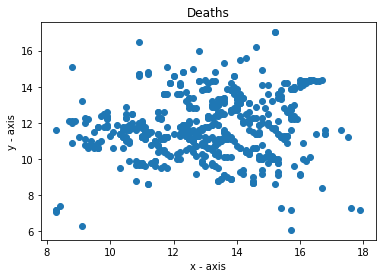

In [7]:
x = [float(row[1]) for row in deaths if row[0] != 'Case']
y = [float(row[2]) for row in deaths if row[0] != 'Case']

# plotting the points 
plt.scatter(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('Deaths')
  
# function to show the plot
plt.show()

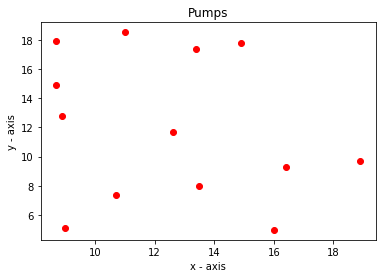

In [12]:
x = [float(row[1]) for row in pumps if row[0] != 'Pump']
y = [float(row[2]) for row in pumps if row[0] != 'Pump']

# plotting the points 
plt.scatter(x, y, c='red')
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('Pumps')
  
# function to show the plot
plt.show()

In [100]:
deaths = [[float(death[1]), float(death[2])] for death in deaths if death[0] != 'Case']
pumps = [[float(pump[1]), float(pump[2])] for pump in pumps if pump[0] != 'Pump']

In [296]:
def get_bounds(row, width, height, radius=1):
    h = (0.119 + ((row[1] - 5) * (0.972 - 0.119) / (18.5 - 5))) * height
    w = (0.339 + ((row[0] - 8.7) * (0.935 - 0.339) / (18.9 - 8.7))) * width
    return [
        (
            w - radius,
            height - h - radius),
        (
            w + radius,
            height - h + radius)
    ]

In [297]:
image = Image.open(image_path)
image = image.convert('RGB')
image.size, len(deaths), len(pumps)

((958, 899), 578, 13)

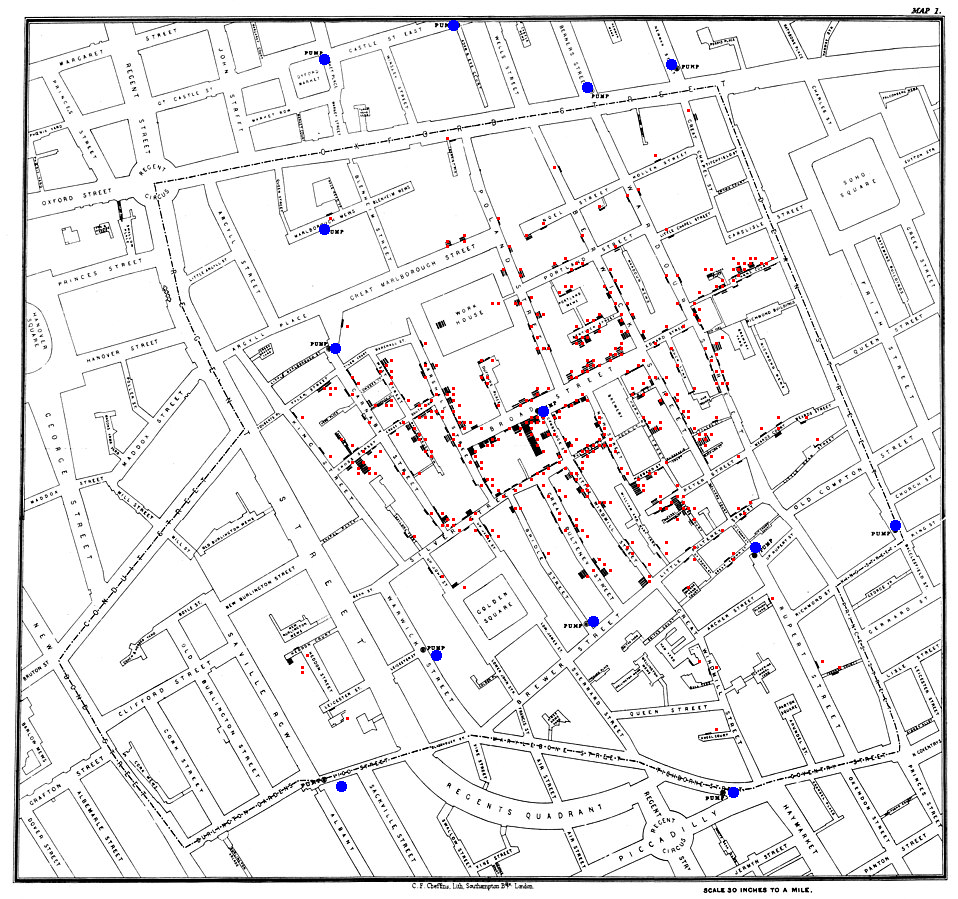

In [300]:
draw = ImageDraw.Draw(image)
width, height = image.size
for death in deaths:
    draw.ellipse(get_bounds(death, width, height), fill="red", outline="red", width=0)
    
for pump in pumps:
    draw.ellipse(get_bounds(pump, width, height, radius=5), fill="blue", outline="blue", width=0)

image

[839.745911111111, 873.828, 811.3441703703702, 834.065562962963, 669.3354666666667, 550.0481555555556, 487.56432592592597, 243.30935555555558, 277.39144444444446, 351.2359703703704, 373.9573629629629, 106.981, 112.66134814814812]


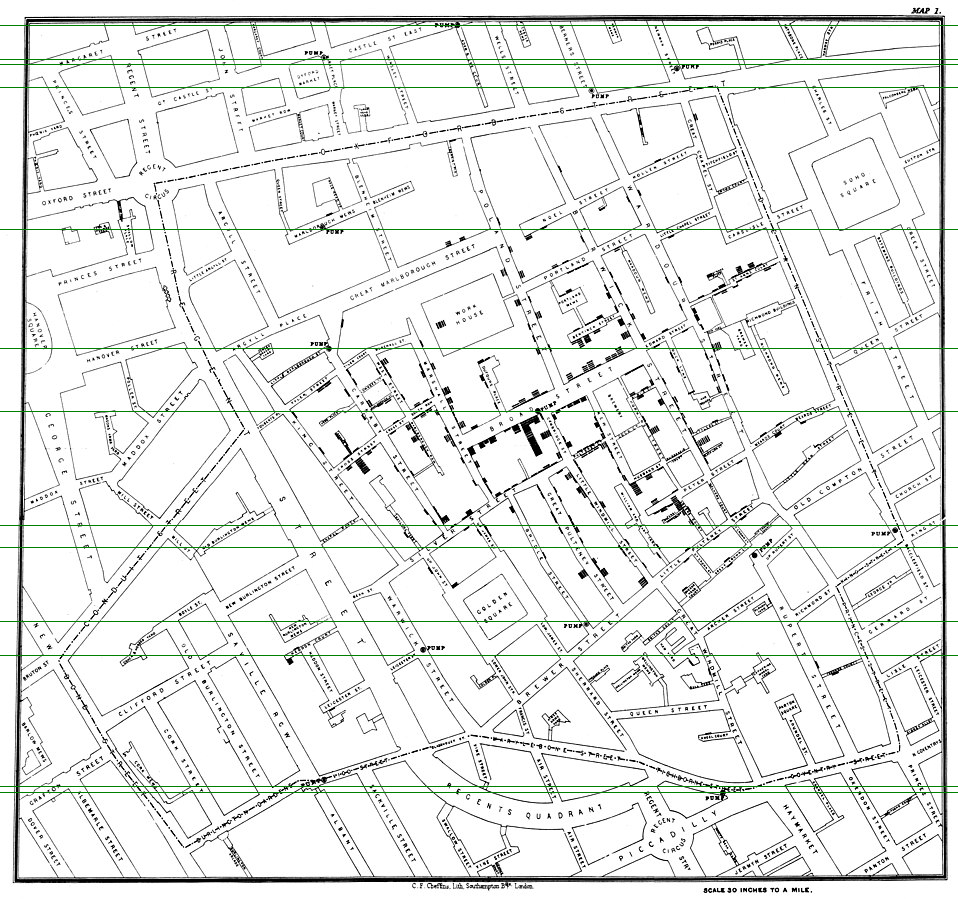

In [256]:
image = Image.open(image_path)
image = image.convert('RGB')
width, height = image.size
draw = ImageDraw.Draw(image)

# draw.line([(0, height - 0.119 * height), (image.size[0], height - 0.119 * height)], fill ="green", width = 0) # 5
# draw.line([(0, height - 0.972 * height), (image.size[0], height - 0.972 * height)], fill ="red", width = 0) # 18.5

hs = []

for pump in pumps:
    h = (0.119 + ((pump[1] - 5) * (0.972 - 0.119) / (18.5 - 5))) * height
    draw.line(
        [
            (0, height - h),
            (image.size[0], height - h)
        ], 
        fill ="green", 
        width = 0
    )
    hs.append(h)

print(hs)
image

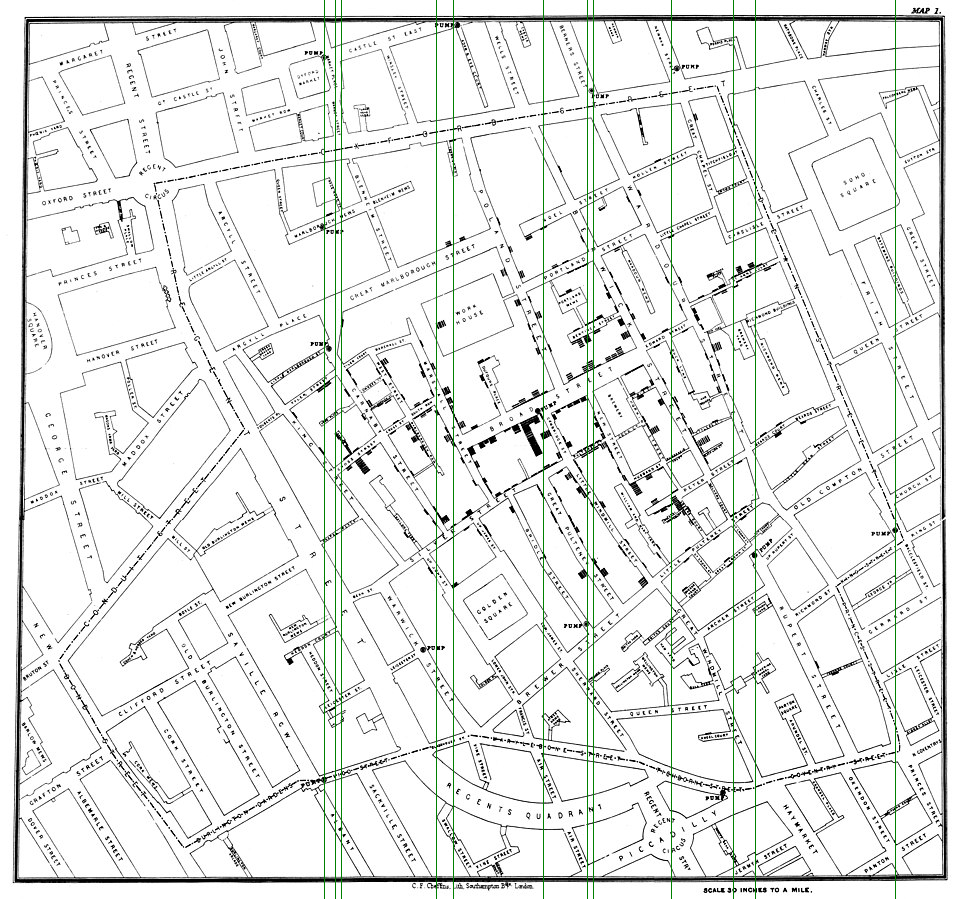

In [268]:
image = Image.open(image_path)
image = image.convert('RGB')
width, height = image.size
draw = ImageDraw.Draw(image)

# draw.ellipse(
#     [
#         (18.9 / 20) * width - 2, 
#         height - (9.7 / 22) * height - 2, 
#         (18.9 / 20) * width + 2, 
#         height - (9.7 / 22) * height + 2
#     ],
#     fill="blue", outline="blue")

# draw.ellipse(
#     [
#         (18.9 / 20) * width - 2, 
#         (9.7 / 22) * height - 2, 
#         (18.9 / 20) * width + 2, 
#         (9.7 / 22) * height + 2
#     ],
#     fill="red", outline="red")

# draw.line([(0.339 * width, 0), (0.339 * width, image.size[1])], fill ="green", width = 0) # 8.7
# draw.line([(0.935 * width, 0), (0.935 * width, image.size[1])], fill ="red", width = 0) # 18.9

ws = []

for pump in pumps:
    w = (0.339 + ((pump[0] - 8.7) * (0.935 - 0.339) / (18.9 - 8.7))) * width
    draw.line(
        [
            (w, 0),
            (w, image.size[1])
        ], 
        fill ="green", 
        width = 0
    )
    ws.append(w)

# print(hs)
image

In [274]:
points = list(zip(ws, hs))

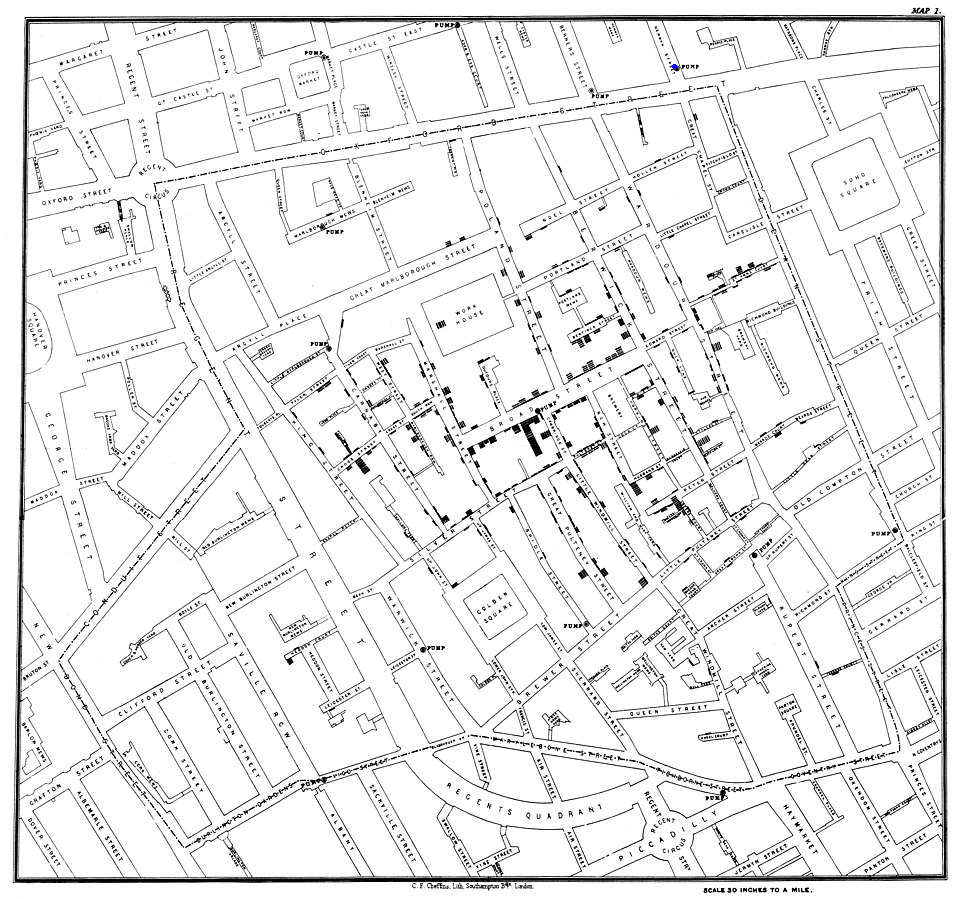

In [295]:
image = Image.open(image_path)
image = image.convert('RGB')
width, height = image.size
draw = ImageDraw.Draw(image)

# for point in points:
#     draw.ellipse(
#         [
#             point[0] - 2, 
#             height - point[1] - 2, 
#             point[0], 
#             height - point[1] + 2
#         ],
#         fill="blue", outline="blue")

# tmp = list(points[3])
# tmp[0] += 3
# tmp[1] -= 2
# points[2] = tmp

point = list(points[2])

draw.ellipse(
    [
        point[0] - 2, 
        height - point[1] - 2, 
        point[0] + 2, 
        height - point[1] + 2
    ],
    fill="blue", outline="blue")
    
image

In [351]:
c_pumps = []
with open("snow/snow6/pumps.csv") as fd:
    rd = csv.reader(fd, delimiter=",")
    for row in rd:
        print(row)
        if row[0] != 'ID':
            c_pumps.append([float(row[2]), float(row[3])])
        
c_pumps

['ID', 'name', 'COORD_X', 'COORD_Y']
['1', 'Broad St Pump', '529396.5394', '181025.063']
['2', 'Little Marlborough St Pump', '529192.5379', '181079.3914']
['3', 'Marlborough Mews Pump', '529183.7398', '181193.735']
['5', 'Rupert St Pump', '529613.2052', '180896.8041']
['6', 'Bridle St Pump', '529453.586', '180826.3532']
['8', 'Warwick St Pump', '529296.1044', '180794.849']
['4', 'Dean St Pump', '529402.7', '180878.3']
['7', 'Tighborne St Pump', '529539.2', '180883.6']


[[529396.5394, 181025.063],
 [529192.5379, 181079.3914],
 [529183.7398, 181193.735],
 [529613.2052, 180896.8041],
 [529453.586, 180826.3532],
 [529296.1044, 180794.849],
 [529402.7, 180878.3],
 [529539.2, 180883.6]]

In [337]:
xratio = abs(529183.7398 - 529396.5394)/abs(0.561 - 0.337)
yratio = abs(181193.735 - 181025.063)/abs(0.747 - 0.543)

xstart = 528863.5904017857
ystart = 180576.09782352942

0.22400000000000003 212.79960000002757 949.9982142858372
0.20399999999999996 168.67199999999139 826.8235294117227
528863.5904017857 180576.09782352942
528863.5904017857 180576.09782352942


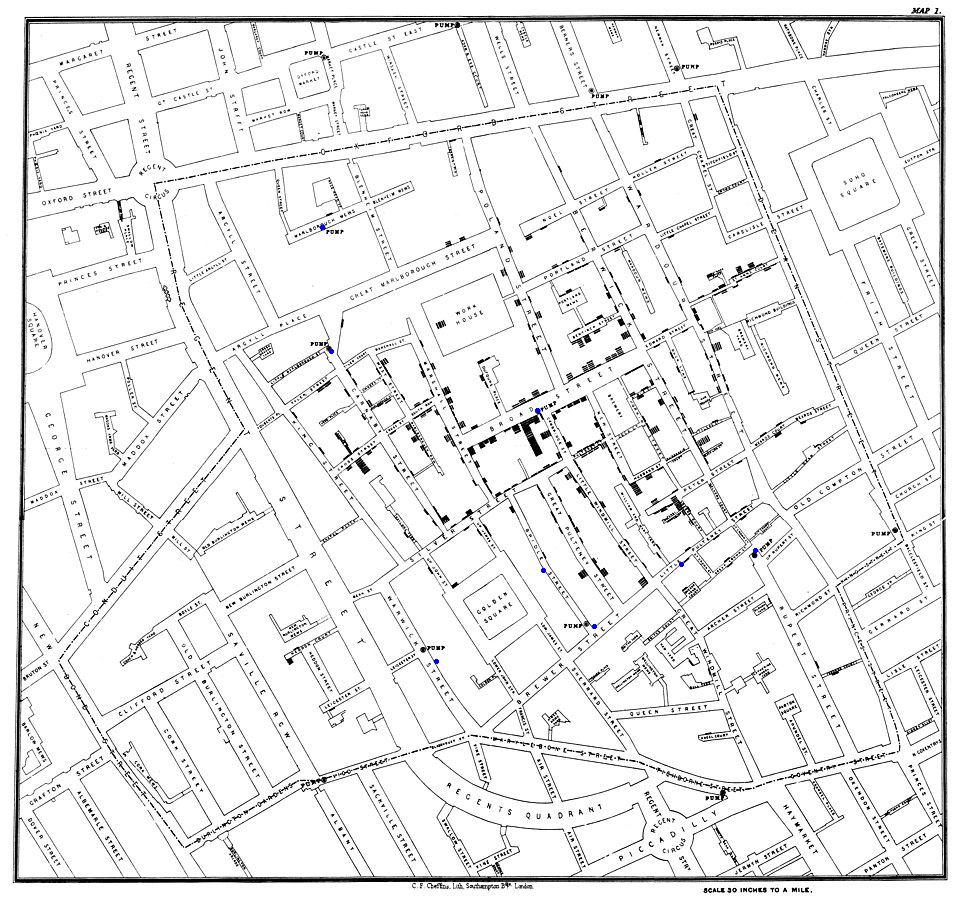

In [352]:
image = Image.open(image_path)
image = image.convert('RGB')
width, height = image.size
draw = ImageDraw.Draw(image)

# draw.line([(0, height - 0.543 * height), (image.size[0], height - 0.543 * height)], fill ="green", width = 0) # 5
# draw.line([(0.561 * width, 0), (0.561 * width, image.size[1])], fill ="green", width = 0) # 8.7
# draw.line([(0, height - 0.747 * height), (image.size[0], height - 0.747 * height)], fill ="red", width = 0) # 18.5
# draw.line([(0.337 * width, 0), (0.337 * width, image.size[1])], fill ="red", width = 0) # 18.9

mmp = (529183.7398, 181193.735)
bsp = (529396.5394, 181025.063)

print(abs(0.561 - 0.337), abs(529183.7398 - 529396.5394), abs(529183.7398 - 529396.5394)/abs(0.561 - 0.337))
print(abs(0.747 - 0.543), abs(181193.735 - 181025.063), abs(181193.735 - 181025.063)/abs(0.747 - 0.543))

xratio = abs(529183.7398 - 529396.5394)/abs(0.561 - 0.337)
yratio = abs(181193.735 - 181025.063)/abs(0.747 - 0.543)

print(529396.5394 - 0.561 * xratio, 181025.063 - 0.543 * yratio)
print(529183.7398 - 0.337 * xratio, 181193.735 - 0.747 * yratio)

xstart = 528863.5904017857
ystart = 180576.09782352942

points = []

for c_pump in c_pumps:
    point = (
        (c_pump[0] - xstart) / xratio,
        (c_pump[1] - ystart) / yratio
    )
    draw.ellipse(
        [
            point[0] * width - 2, 
            height - point[1] * height - 2, 
            point[0] * width + 2, 
            height - point[1] * height + 2
        ],
        fill="blue", outline="blue")
    points.append(point)

# print(hs)
image

In [338]:
with open('pump_map.csv', 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 

    # writing the data rows 
    csvwriter.writerows(points)

In [358]:
df = pd.read_csv("snow/snow1/deaths_nd_by_house.csv")
df[df['deaths'] > 0].shape, pd.unique(df[df['deaths'] > 0]['deaths'])

((369, 11), array([ 1,  5,  2,  6,  3,  4,  8, 18, 12,  7], dtype=int64))

In [364]:
c_deaths = []
with open("snow/snow1/deaths_nd_by_house.csv") as fd:
    rd = csv.reader(fd, delimiter=",")
    for row in rd:
        if row[0] != 'ID' and int(row[3]) > 0:
            c_deaths.append([float(row[9]), float(row[10]), int(row[3])])
        
len(c_deaths)

369

528863.5904017857 180576.09782352942
528863.5904017857 180576.09782352942


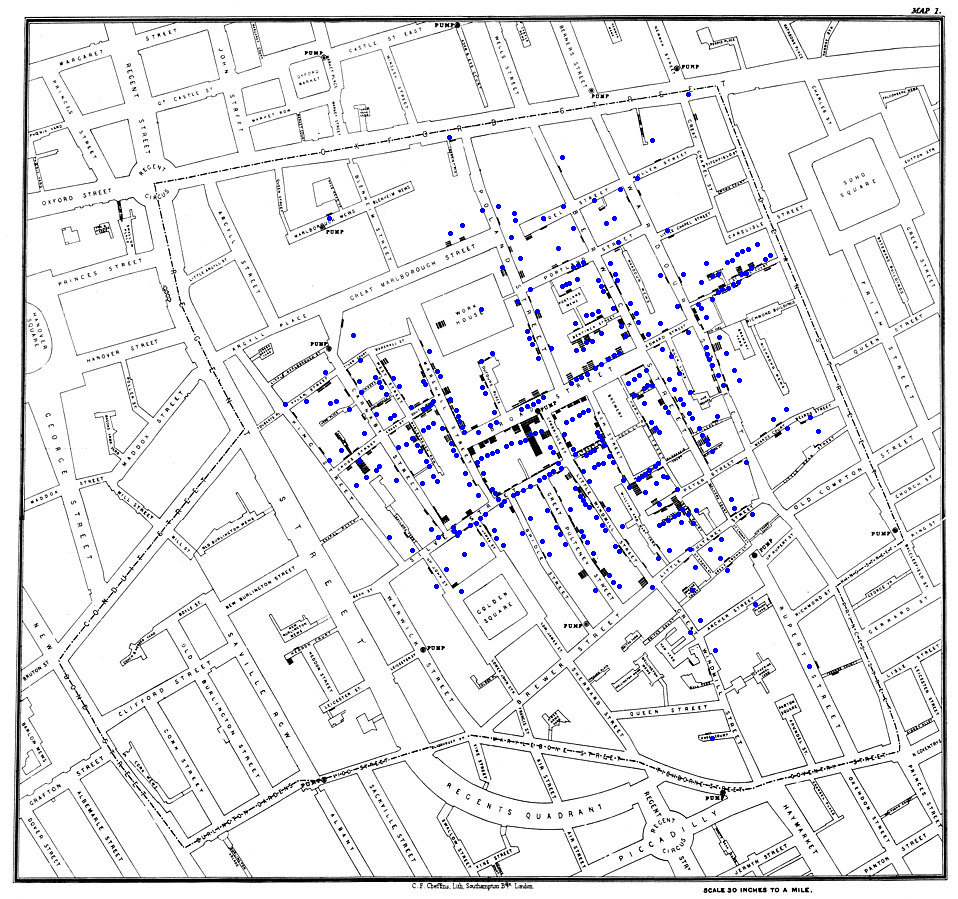

In [368]:
image = Image.open(image_path)
image = image.convert('RGB')
width, height = image.size
draw = ImageDraw.Draw(image)

xratio = abs(529183.7398 - 529396.5394)/abs(0.561 - 0.337)
yratio = abs(181193.735 - 181025.063)/abs(0.747 - 0.543)

print(529396.5394 - 0.561 * xratio, 181025.063 - 0.543 * yratio)
print(529183.7398 - 0.337 * xratio, 181193.735 - 0.747 * yratio)

xstart = 528863.5904017857
ystart = 180576.09782352942

points = []

for c_death in c_deaths:
    point = (
        (c_death[0] - xstart) / xratio,
        (c_death[1] - ystart) / yratio,
        c_death[2]
    )
    draw.ellipse(
        [
            point[0] * width - 2, 
            height - point[1] * height - 2, 
            point[0] * width + 2, 
            height - point[1] * height + 2
        ],
        fill="blue", outline="blue")
    points.append(point)

# print(hs)
image

In [369]:
with open('death_map.csv', 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 

    # writing the data rows 
    csvwriter.writerows(points)

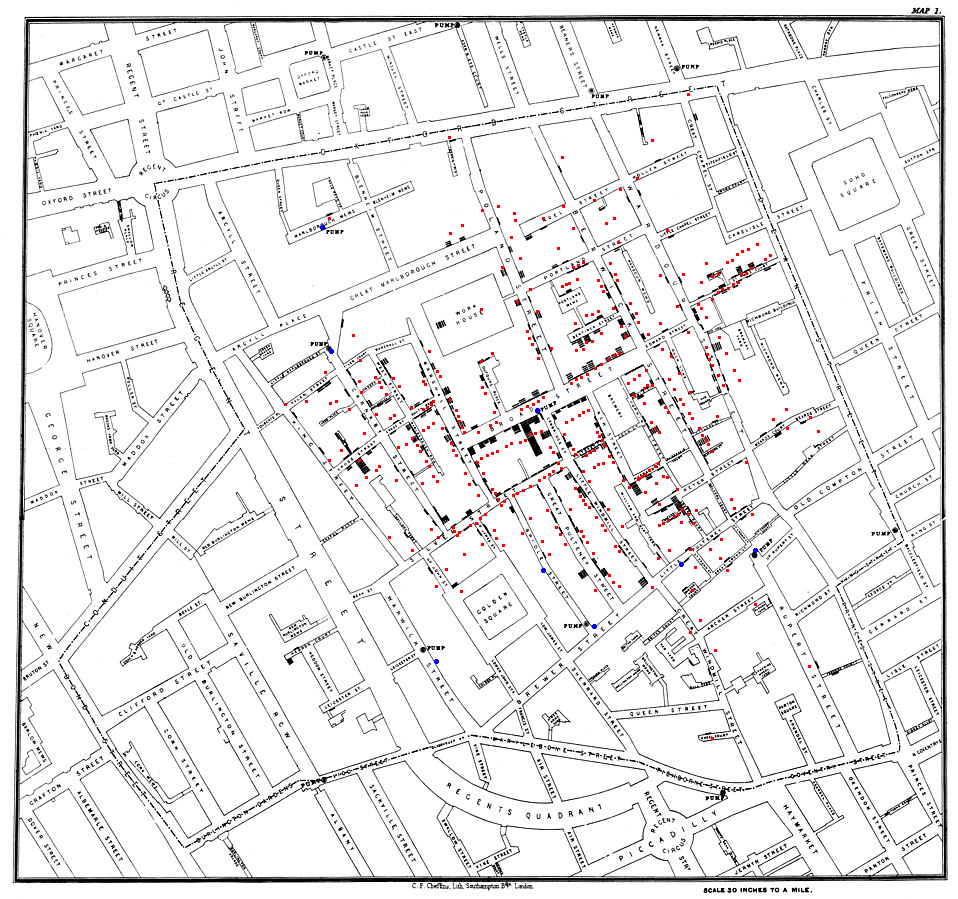

In [371]:
test_pumps = []
with open("pump_map.csv") as fd:
    rd = csv.reader(fd, delimiter=",")
    for row in rd:
        if len(row) > 0:
            test_pumps.append([float(row[0]), float(row[1])])

test_deaths = []
with open("death_map.csv") as fd:
    rd = csv.reader(fd, delimiter=",")
    for row in rd:
        if len(row) > 0:
            test_deaths.append([float(row[0]), float(row[1]), int(row[2])])

image = Image.open(image_path)
image = image.convert('RGB')
width, height = image.size
draw = ImageDraw.Draw(image)

for point in test_pumps:
    draw.ellipse(
        [
            point[0] * width - 2, 
            height - point[1] * height - 2, 
            point[0] * width + 2, 
            height - point[1] * height + 2
        ],
        fill="blue", outline="blue")
    
for point in test_deaths:
    draw.ellipse(
        [
            point[0] * width - 1, 
            height - point[1] * height - 1, 
            point[0] * width + 1, 
            height - point[1] * height + 1
        ],
        fill="red", outline="red")

# print(hs)
image